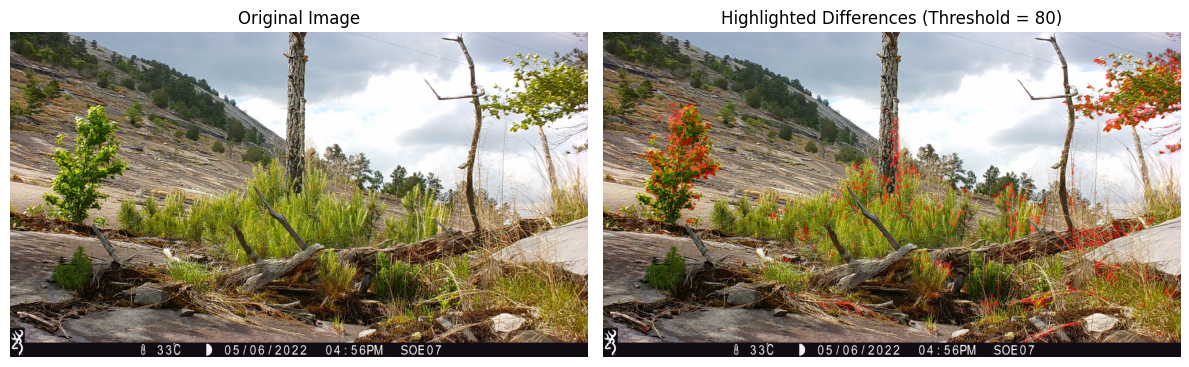

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys

# =========================================================
# 1) Load the three images
# =========================================================
img1 = cv2.imread('1.JPG')
img2 = cv2.imread('2.JPG')
img3 = cv2.imread('3.JPG')

# Verify they loaded correctly
for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        sys.exit(f"❌ Error: Image {i}.JPG not found. Check the path or filename.")

# Resize to same size (important for comparison)
h, w = img1.shape[:2]
img2 = cv2.resize(img2, (w, h))
img3 = cv2.resize(img3, (w, h))

# =========================================================
# 2) Compute absolute pixel differences between images
# =========================================================
diff12 = cv2.absdiff(img1, img2)
diff23 = cv2.absdiff(img2, img3)
diff13 = cv2.absdiff(img1, img3)

# Combine all differences
combined_diff = cv2.bitwise_or(diff12, diff23)
combined_diff = cv2.bitwise_or(combined_diff, diff13)

# =========================================================
# 3) Convert to grayscale and apply a *higher threshold*
# =========================================================
gray = cv2.cvtColor(combined_diff, cv2.COLOR_BGR2GRAY)

# ⬆️ Increase threshold value from 30 → 80 (tune this value as needed)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Optional: smoothen small specks/noise
thresh = cv2.medianBlur(thresh, 5)

# =========================================================
# 4) Overlay the differences (red) on top of the first image
# =========================================================
overlay = img1.copy()
overlay[thresh > 0] = [0, 0, 255]   # red color marks difference

alpha = 0.5  # transparency control
highlighted = cv2.addWeighted(img1, alpha, overlay, 1 - alpha, 0)

# =========================================================
# 5) Display results
# =========================================================
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Highlighted Differences (Threshold = 80)')
plt.imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


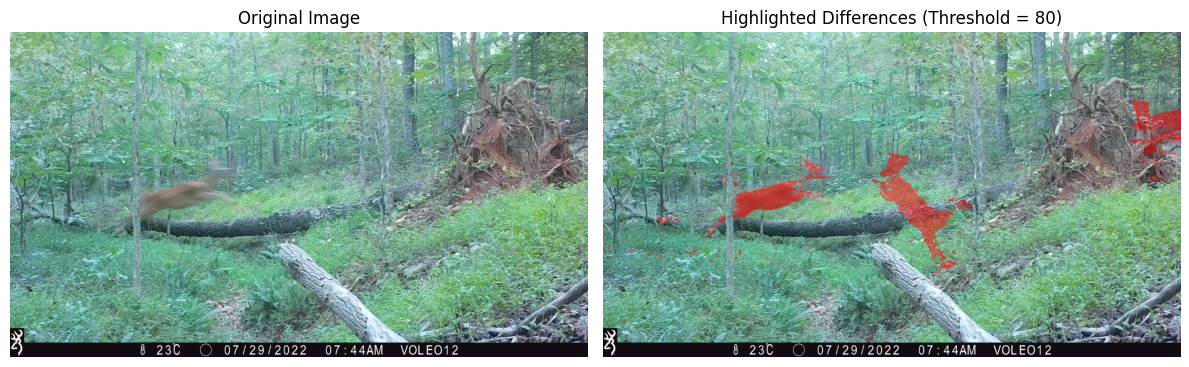

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys

# =========================================================
# 1) Load the three images
# =========================================================
img1 = cv2.imread('4.JPG')
img2 = cv2.imread('5.JPG')
img3 = cv2.imread('6.JPG')

# Verify they loaded correctly
for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        sys.exit(f"❌ Error: Image {i}.JPG not found. Check the path or filename.")

# Resize to same size (important for comparison)
h, w = img1.shape[:2]
img2 = cv2.resize(img2, (w, h))
img3 = cv2.resize(img3, (w, h))

# =========================================================
# 2) Compute absolute pixel differences between images
# =========================================================
diff12 = cv2.absdiff(img1, img2)
diff23 = cv2.absdiff(img2, img3)
diff13 = cv2.absdiff(img1, img3)

# Combine all differences
combined_diff = cv2.bitwise_or(diff12, diff23)
combined_diff = cv2.bitwise_or(combined_diff, diff13)

# =========================================================
# 3) Convert to grayscale and apply a *higher threshold*
# =========================================================
gray = cv2.cvtColor(combined_diff, cv2.COLOR_BGR2GRAY)

# ⬆️ Increase threshold value from 30 → 80 (tune this value as needed)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

# Optional: smoothen small specks/noise
thresh = cv2.medianBlur(thresh, 5)

# =========================================================
# 4) Overlay the differences (red) on top of the first image
# =========================================================
overlay = img1.copy()
overlay[thresh > 0] = [0, 0, 255]   # red color marks difference

alpha = 0.5  # transparency control
highlighted = cv2.addWeighted(img1, alpha, overlay, 1 - alpha, 0)

# =========================================================
# 5) Display results
# =========================================================
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Highlighted Differences (Threshold = 80)')
plt.imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


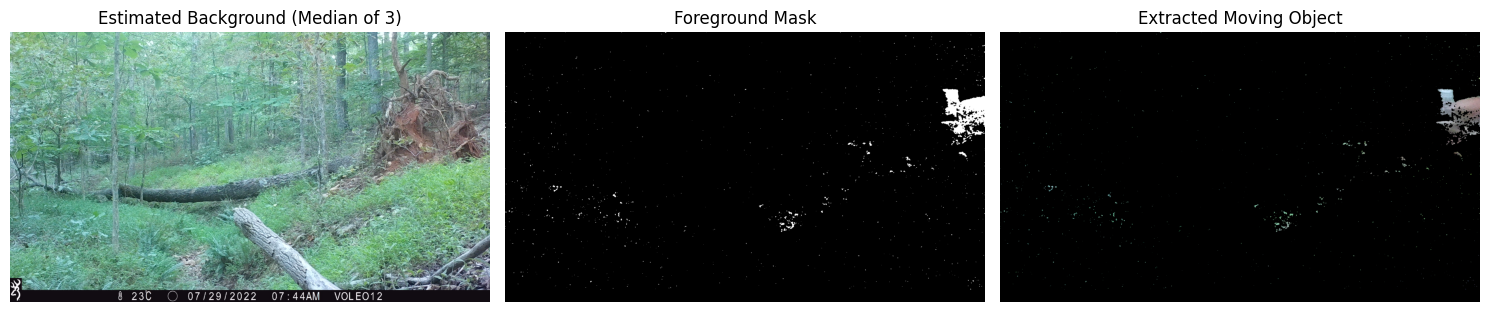

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys

# =========================================================
# 1) Load the three sequential images
# =========================================================
img1 = cv2.imread('4.JPG')
img2 = cv2.imread('5.JPG')
img3 = cv2.imread('6.JPG')

for i, img in enumerate([img1, img2, img3], start=1):
    if img is None:
        sys.exit(f"❌ Error: Image {i}.JPG not found. Check path or filename.")

# Resize to same size
h, w = img1.shape[:2]
img2 = cv2.resize(img2, (w, h))
img3 = cv2.resize(img3, (w, h))

# =========================================================
# 2) Stack images and compute median pixel value
# =========================================================
stack = np.stack([img1, img2, img3], axis=3)
background = np.median(stack, axis=3).astype(np.uint8)

# =========================================================
# 3) Optional: Extract moving objects (foreground)
# =========================================================
# Absolute difference between frame and estimated background
diff = cv2.absdiff(img2, background)

# Convert to grayscale + threshold to highlight moving parts
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, foreground_mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Smooth the mask
foreground_mask = cv2.medianBlur(foreground_mask, 5)

# Apply mask on original image to keep only moving object
foreground = cv2.bitwise_and(img2, img2, mask=foreground_mask)

# =========================================================
# 4) Display results
# =========================================================
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Estimated Background (Median of 3)')
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Foreground Mask')
plt.imshow(foreground_mask, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Extracted Moving Object')
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
